# Organizing my Spotify Playlists using Data Science
*by Ankush Bharadwaj*

### Problem
Given a Spotify playlist with far too many songs and an overall inconsistent listening experience, how can I use data science to break this large playlist into smaller groups of similar songs?

## Access Tracks and Audio Features of my Spotify Playlist
The first step of my procedure was to access the tracks in the Spotify playlist I would like to reorganize, and then generate audio features for each of these tracks that I will later use to cluster the tracks into similar groups. To do this, I simply utilized Spotify's Web API, as well as the spotipy Python library. Specifically, the instructions at the link [here](https://morioh.com/p/31b8a607b2b0), as well as the examples and documentation on Spotipy's documentation [site](https://spotipy.readthedocs.io/en/2.13.0/), were tremendously helpful for me to complete this process.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_id = 'client_id'
client_secret = 'client_secret'

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

id_test = sp.user_playlist_tracks('ankushbharadwaj', 'playlist_id')['items'][0]['track']['id']

columns = ['artist', 'track']
list(map(lambda x: columns.append(x), list(sp.audio_features(id_test)[0].keys())))

playlist_tracks = pd.DataFrame(columns = columns, index = range(0, 124))
playlist_tracks.head()

,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
playlist_ids = ['playlist_id', 'playlist_id']
row_counter = 0

for playlist_id in playlist_ids:
    for track in sp.user_playlist_tracks('ankushbharadwaj', playlist_id)['items']:
        current_id = track['track']['id']
        current_row = [track['track']['artists'][0]['name'], track['track']['name']]
        (list(map(lambda x: current_row.append(x), list(sp.audio_features(current_id)[0].values()))))
        playlist_tracks.iloc[row_counter] = current_row
        row_counter += 1
playlist_tracks

,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Dijon,Skin,0.674,0.616,7,-3.471,1,0.0272,0.512,2.1e-06,0.331,0.551,94.934,audio_features,467t3218y3yihFcyDGWjr0,spotify:track:467t3218y3yihFcyDGWjr0,https://api.spotify.com/v1/tracks/467t3218y3yi...,https://api.spotify.com/v1/audio-analysis/467t...,230625,4
1,Dijon,Violence),0.465,0.595,7,-3.644,1,0.0458,0.338,0,0.324,0.199,132.617,audio_features,2tpggu2I0gzR4cHBQRuHj6,spotify:track:2tpggu2I0gzR4cHBQRuHj6,https://api.spotify.com/v1/tracks/2tpggu2I0gzR...,https://api.spotify.com/v1/audio-analysis/2tpg...,205500,4
2,Abhi//Dijon,Often,0.599,0.27,4,-17.638,1,0.0905,0.845,0.00042,0.11,0.377,124.155,audio_features,4RdBZE3BH44wZXoj2vmjez,spotify:track:4RdBZE3BH44wZXoj2vmjez,https://api.spotify.com/v1/tracks/4RdBZE3BH44w...,https://api.spotify.com/v1/audio-analysis/4RdB...,189786,5
3,EDEN,rock + roll,0.468,0.517,0,-7.049,0,0.0574,0.875,0.00705,0.171,0.425,69.282,audio_features,0Mf6WhWLfOpzOxacvbcboj,spotify:track:0Mf6WhWLfOpzOxacvbcboj,https://api.spotify.com/v1/tracks/0Mf6WhWLfOpz...,https://api.spotify.com/v1/audio-analysis/0Mf6...,296053,4
4,BROCKHAMPTON,LOVE ME FOR LIFE,0.839,0.416,5,-7.658,1,0.0876,0.0319,0,0.166,0.567,125.969,audio_features,41PCkAcfU1UiSKUDtt6tXQ,spotify:track:41PCkAcfU1UiSKUDtt6tXQ,https://api.spotify.com/v1/tracks/41PCkAcfU1Ui...,https://api.spotify.com/v1/audio-analysis/41PC...,215013,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,Nujabes,Luv (sic),0.906,0.677,1,-5.558,1,0.216,0.436,0.0273,0.652,0.869,93.017,audio_features,6SNGzhVrisdq63Ndz58ovT,spotify:track:6SNGzhVrisdq63Ndz58ovT,https://api.spotify.com/v1/tracks/6SNGzhVrisdq...,https://api.spotify.com/v1/audio-analysis/6SNG...,286320,4
120,Nujabes,Latitude -remix (feat. Five Deez),0.823,0.814,7,-5.611,0,0.177,0.644,0.687,0.117,0.649,102.619,audio_features,65u7IbuZ4viAlVBHxnpos1,spotify:track:65u7IbuZ4viAlVBHxnpos1,https://api.spotify.com/v1/tracks/65u7IbuZ4viA...,https://api.spotify.com/v1/audio-analysis/65u7...,236533,4
121,Lil Peep,yesterday,0.583,0.573,2,-7.396,1,0.0348,0.00214,0,0.152,0.129,87.922,audio_features,1oZX407PWkU5ETtmRy3zL8,spotify:track:1oZX407PWkU5ETtmRy3zL8,https://api.spotify.com/v1/tracks/1oZX407PWkU5...,https://api.spotify.com/v1/audio-analysis/1oZX...,112520,4
122,Nujabes,Feather (feat. Cise Starr & Akin from CYNE),0.565,0.749,10,-6.629,0,0.0769,0.655,0.432,0.106,0.881,180.598,audio_features,2ej1A2Ze6P2EOW7KfIosZR,spotify:track:2ej1A2Ze6P2EOW7KfIosZR,https://api.spotify.com/v1/tracks/2ej1A2Ze6P2E...,https://api.spotify.com/v1/audio-analysis/2ej1...,175360,4


Now that we have all the songs in the playlist I want to reorganize, as well as the audio features of all these songs, let's make sure we only have columns that are relevant and that the data types of all the variables are numeric where they can be.

In [3]:
playlist_tracks.drop(['type', 'id', 'uri', 'track_href', 'analysis_url'], axis = 1, inplace = True)
playlist_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   artist            124 non-null    object
 1   track             124 non-null    object
 2   danceability      124 non-null    object
 3   energy            124 non-null    object
 4   key               124 non-null    object
 5   loudness          124 non-null    object
 6   mode              124 non-null    object
 7   speechiness       124 non-null    object
 8   acousticness      124 non-null    object
 9   instrumentalness  124 non-null    object
 10  liveness          124 non-null    object
 11  valence           124 non-null    object
 12  tempo             124 non-null    object
 13  duration_ms       124 non-null    object
 14  time_signature    124 non-null    object
dtypes: object(15)
memory usage: 14.7+ KB


And to change the datatypes...

In [4]:
playlist_tracks = playlist_tracks.astype({'danceability': float,
                                        'energy': float,
                                        'key': int,
                                        'loudness': float,
                                        'mode': int,
                                        'speechiness': float,
                                        'acousticness': float,
                                        'instrumentalness': float,
                                        'liveness': float,
                                        'valence': float,
                                        'tempo': float,
                                        'duration_ms': float,
                                        'time_signature': float})
playlist_tracks.dtypes

artist               object
track                object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms         float64
time_signature      float64
dtype: object

In [5]:
playlist_tracks.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,0.573887,0.626758,5.072581,-7.767056,0.604839,0.108598,0.232247,0.058325,0.210293,0.414401,121.663435,227588.040323,3.951613
std,0.161638,0.186473,3.545691,3.073929,0.490869,0.100770,0.268534,0.168236,0.179471,0.234442,32.083616,70303.939735,0.250360
min,0.216000,0.217000,0.000000,-17.638000,0.000000,0.025700,0.000015,0.000000,0.048800,0.035200,69.282000,79797.000000,3.000000
25%,0.462250,0.478500,1.750000,-9.352000,0.000000,0.041175,0.015500,0.000000,0.105000,0.223500,92.734750,179915.250000,4.000000
50%,0.560000,0.633500,5.000000,-7.354000,1.000000,0.063250,0.110000,0.000099,0.122500,0.386000,116.979500,221447.000000,4.000000
75%,0.693500,0.770250,8.000000,-5.809500,1.000000,0.146250,0.397750,0.005650,0.242000,0.589750,145.442250,265716.750000,4.000000
max,0.917000,0.989000,11.000000,0.402000,1.000000,0.558000,0.890000,0.839000,0.868000,0.893000,194.276000,462253.000000,5.000000


With this final peak into our dataset, it's time to move on to the...

## Exploratory Data Analysis
Normally, it would make sense to look at all of these different audio features and get an understanding of their distribution or something along those lines. However, I believe it would be more interesting to check out the correlation between all the audio features, as well as which ones would be grouped together by hierarchal clustering in Seaborn.

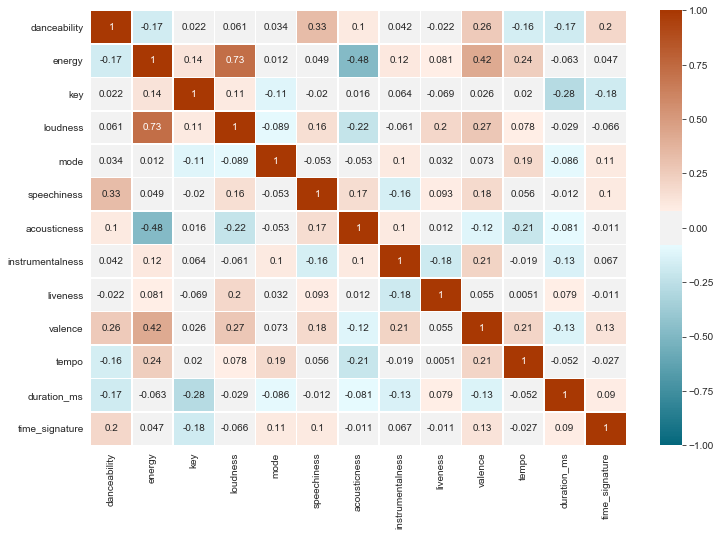

In [6]:
sns.set_style('darkgrid')
plt.figure(figsize = (12,8))

cmap = sns.diverging_palette(220, 20, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True) 
sns.heatmap(playlist_tracks.drop(['artist', 'track'], axis = 1).corr(), vmin = -1, vmax = 1, annot = True, cmap = cmap, lw = .5, linecolor = 'white')

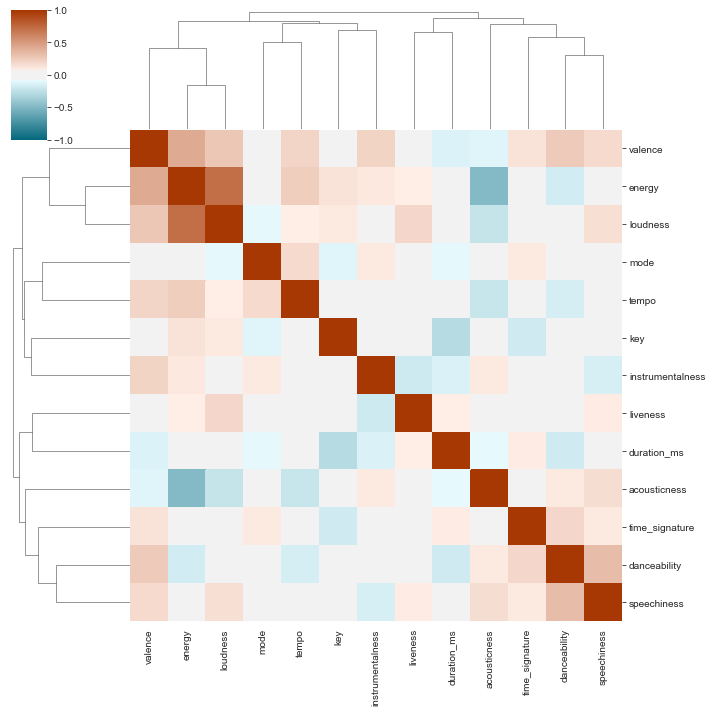

In [7]:
sns.clustermap(playlist_tracks.drop(['artist', 'track'], axis = 1).corr(), cmap = cmap, vmin = -1, vmax = 1)

So in general, there isn't too much correlation between different variables, aside from a strong positive correlation between energy and loudnesss, which makes sense. To further explore our data, as well as decompose the numerous audio features we have into a set of variables that are easier to visualize, I'll be moving forward with an implementation of principal component analysis, or PCA. 

I will first use Scikit-learn's StandardScaler() to scale the data, and then I will use a PCA instance that looks for two principal components of the data. From there, I will first visualize how the two principal components are determined from the original variables, then explore the variation explained by differing numbers of principal componenets. 

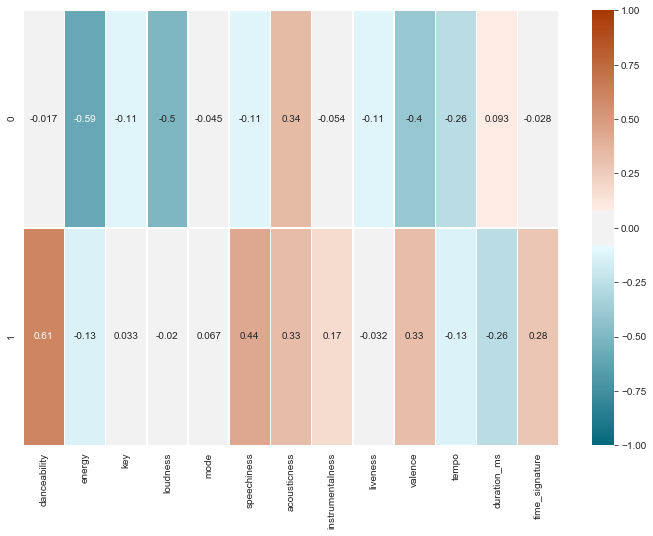

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(playlist_tracks.drop(['artist', 'track'], axis = 1))
scaled_data = scaler.transform(playlist_tracks.drop(['artist', 'track'], axis = 1))

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)

pca_corr = pd.DataFrame(pca.components_, columns = playlist_tracks.drop(['artist', 'track'], axis = 1).columns)

plt.figure(figsize = (12,8))
sns.heatmap(pca_corr, cmap = cmap, vmin = -1, vmax = 1, annot = True, lw = .5, linecolor = 'white')

Text(0, 0.5, 'PC2: 0.13')

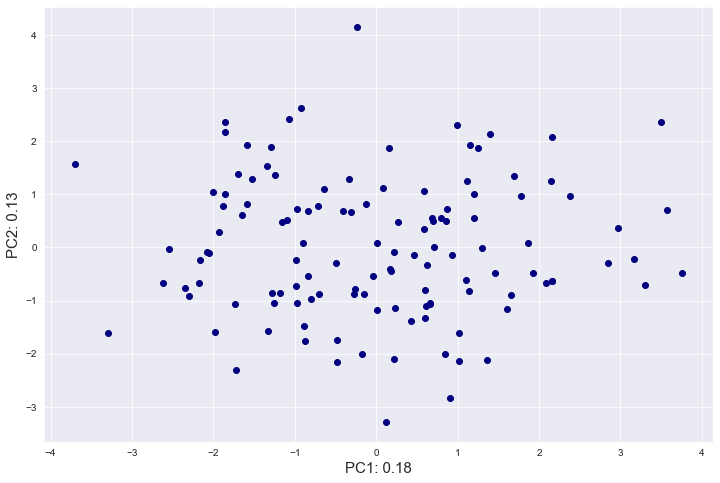

In [9]:
plt.figure(figsize = (12, 8))
plt.scatter(data_pca[:,0], data_pca[:,1], c = 'navy')
plt.xlabel('PC1: {:.2f}'.format(pca.explained_variance_ratio_[0]), size = 15)
plt.ylabel('PC2: {:.2f}'.format(pca.explained_variance_ratio_[1]), size = 15)

It's clear that the first two principal components don't explain too much of the variance we see. (As an aside, the numbers along the axis titles indicate the ratio of the variance explained by that principal component). Maybe if we increase the number of principal components we extract from the PCA, we'd see more variance explained. 

Text(0, 0.5, 'Ratio of Variance Explained')

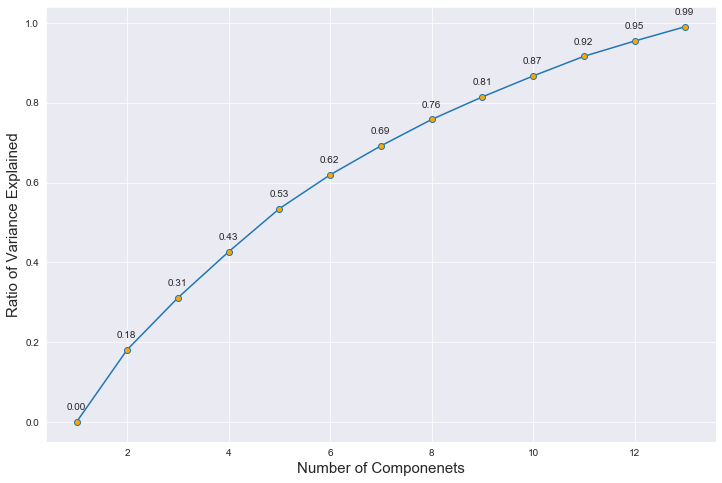

In [10]:
exp_var_ratio = []

for n in range(0,13):
    pca = PCA(n_components = n)
    pca.fit(scaled_data)
    pca.transform(scaled_data)
    exp_var_ratio.append(sum(pca.explained_variance_ratio_))

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
plt.plot(range(1,14), exp_var_ratio, marker = 'o', markerfacecolor = 'orange', markersize = 6)
for i,j in zip(range(1,14),exp_var_ratio):
    ax.annotate('{:.2f}'.format(j),xy=(i-.2,j+.03))
plt.xlabel('Number of Componenets', size = 15)
plt.ylabel('Ratio of Variance Explained', size = 15)

Hm... we don't see a distinctive elbow at any point of this plot, which is problematic because I don't want to pass 8 principal components into my clustering algorithm when these principal components barely explain 80% of the variance in the data. 

## K Means Clustering

Using K Means clustering, I will be choosing to break my playlist into 4 smaller playlists, because that seems like a solid middle ground of having just the right amount of songs in each playlist. 

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(playlist_tracks.drop(['artist', 'track'], axis = 1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

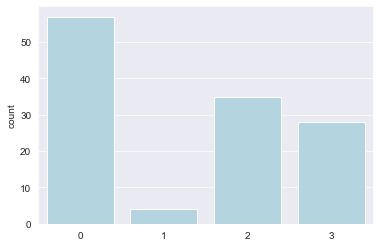

In [12]:
sns.countplot([str(group) for group in kmeans.labels_], color = 'lightblue')

Well, one of the clusters that the algorithm created has under 10 songs, which doesn't seem like a playlist I'd listen to that often. Let's drop the number of clusters by one:

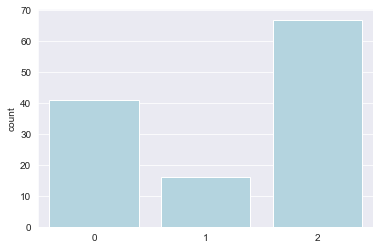

In [13]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(playlist_tracks.drop(['artist', 'track'], axis = 1))
sns.countplot([str(group) for group in kmeans.labels_], color = 'lightblue')

And that's better. From here, we will be re-visiting the PCA to see if a principal component predicts the cluster a song is placed into. 

## Visualizing the Clusters

Text(0, 0.5, 'PC2: 0.13')

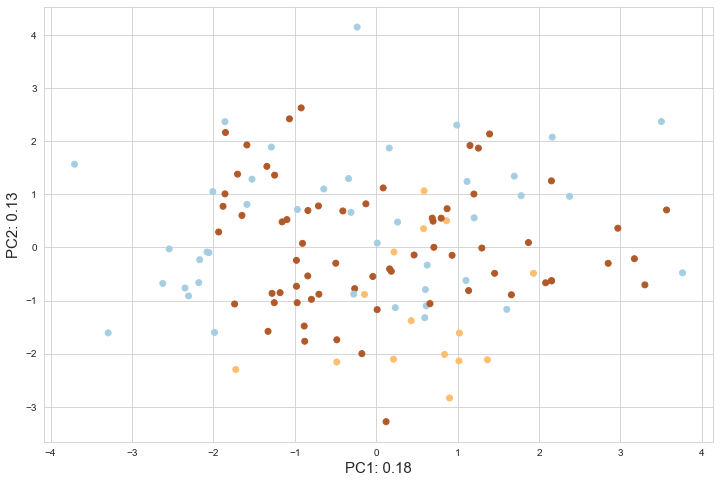

In [14]:
pca = PCA(n_components = 2)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)

sns.set_style('whitegrid')

plt.figure(figsize = (12, 8))
plt.scatter(data_pca[:,0], data_pca[:,1], c = list(kmeans.labels_), cmap = 'Paired')
plt.xlabel('PC1: {:.2f}'.format(pca.explained_variance_ratio_[0]), size = 15)
plt.ylabel('PC2: {:.2f}'.format(pca.explained_variance_ratio_[1]), size = 15)

As you could have predicted, the first and second principal components don't really help us visualize the differences between different clusters. Maybe by including a third principal component we'll get some explanation?

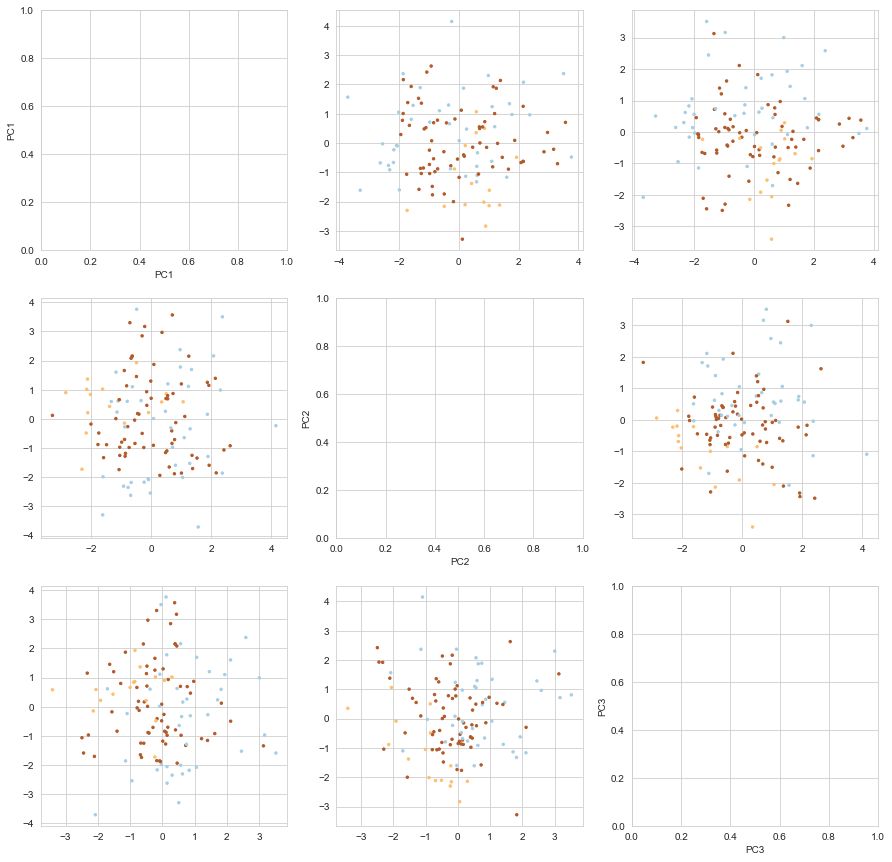

In [15]:
pca = PCA(n_components = 3)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)

sns.set_style('whitegrid')
fig, ax = plt.subplots(3,3,figsize = (15,15), squeeze = False)

for x in range(0,3):
    for y in range(0,3):
        if x != y:
            ax[x, y].scatter(data_pca[:,x], data_pca[:,y], c = list(kmeans.labels_), cmap = 'Paired', s = 6)
        else:
            ax[x,y].set_ylabel('PC{}'.format(x+1))
            ax[x,y].set_xlabel('PC{}'.format(x+1))
            continue

Nope, even with a third principal component it's tough to visualize a distinct separation between the clusters. Generally, this makes sense, given the fact that each principal component explained a small amount of the variance in the data. 

Moving forward, let's look at differences in the audio features of each group.

In [16]:
playlist_tracks['group'] = list(kmeans.labels_)
playlist_tracks = playlist_tracks.astype({'group': str})
playlist_tracks.head()

,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,group
0,Dijon,Skin,0.674,0.616,7,-3.471,1,0.0272,0.5120,0.000002,0.331,0.551,94.934,230625.0,4.0,2
1,Dijon,Violence),0.465,0.595,7,-3.644,1,0.0458,0.3380,0.000000,0.324,0.199,132.617,205500.0,4.0,2
2,Abhi//Dijon,Often,0.599,0.270,4,-17.638,1,0.0905,0.8450,0.000420,0.110,0.377,124.155,189786.0,5.0,0
3,EDEN,rock + roll,0.468,0.517,0,-7.049,0,0.0574,0.8750,0.007050,0.171,0.425,69.282,296053.0,4.0,2
4,BROCKHAMPTON,LOVE ME FOR LIFE,0.839,0.416,5,-7.658,1,0.0876,0.0319,0.000000,0.166,0.567,125.969,215013.0,4.0,2


In [17]:
playlist_tracks[playlist_tracks['group'] == '0'].describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,0.580634,0.650927,6.365854,-7.724537,0.634146,0.116037,0.261791,0.078939,0.222717,0.470237,126.348366,157149.780488,3.926829
std,0.169447,0.221496,3.547930,3.600253,0.487652,0.110520,0.294021,0.204159,0.185643,0.241635,33.233548,27262.786167,0.345705
min,0.246000,0.238000,0.000000,-17.638000,0.000000,0.028500,0.000048,0.000000,0.072700,0.064400,76.996000,79797.000000,3.000000
25%,0.464000,0.473000,4.000000,-9.397000,0.000000,0.042600,0.006700,0.000000,0.106000,0.278000,98.732000,139663.000000,4.000000
50%,0.565000,0.633000,8.000000,-7.459000,1.000000,0.082700,0.163000,0.000153,0.123000,0.459000,124.155000,161876.000000,4.000000
75%,0.724000,0.865000,9.000000,-5.897000,1.000000,0.142000,0.511000,0.005520,0.317000,0.667000,151.912000,179013.000000,4.000000
max,0.892000,0.989000,11.000000,0.402000,1.000000,0.558000,0.890000,0.799000,0.783000,0.881000,184.737000,195047.000000,5.000000


In [18]:
playlist_tracks[playlist_tracks['group'] == '1'].describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,16.000000,16.000000,16.000000,16.000000,16.000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,0.474750,0.604937,3.937500,-7.998313,0.375,0.100194,0.210754,0.030862,0.205963,0.321606,121.170875,359591.000000,3.875000
std,0.138021,0.142308,2.489143,2.267522,0.500,0.093259,0.253853,0.064854,0.144503,0.203551,34.894341,54131.444203,0.341565
min,0.272000,0.326000,1.000000,-10.992000,0.000,0.030500,0.000217,0.000000,0.077400,0.094700,79.319000,308500.000000,3.000000
25%,0.393000,0.524000,1.000000,-9.914250,0.000,0.041150,0.045550,0.000006,0.115250,0.148500,86.309750,318263.500000,4.000000
50%,0.431500,0.634000,4.500000,-7.633500,0.000,0.055600,0.096050,0.000189,0.125500,0.268000,114.384000,344145.000000,4.000000
75%,0.540000,0.678500,5.250000,-6.803250,1.000,0.110575,0.265250,0.006887,0.246500,0.438000,151.773750,368817.000000,4.000000
max,0.745000,0.831000,9.000000,-3.276000,1.000,0.339000,0.832000,0.206000,0.527000,0.689000,179.853000,462253.000000,4.000000


In [19]:
playlist_tracks[playlist_tracks['group'] == '2'].describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,0.593433,0.617179,4.552239,-7.737851,0.641791,0.106054,0.219300,0.052269,0.203724,0.402393,118.914164,239168.955224,3.985075
std,0.155440,0.172903,3.572978,2.927527,0.483093,0.097401,0.257924,0.161388,0.185069,0.231208,30.836303,25541.338745,0.122169
min,0.216000,0.217000,0.000000,-15.372000,0.000000,0.025700,0.000015,0.000000,0.048800,0.035200,69.282000,198667.000000,3.000000
25%,0.484500,0.483500,1.000000,-8.861000,0.000000,0.038800,0.015700,0.000000,0.103500,0.238000,92.452500,219633.500000,4.000000
50%,0.580000,0.637000,4.000000,-7.224000,1.000000,0.057900,0.101000,0.000071,0.121000,0.370000,115.174000,236973.000000,4.000000
75%,0.705500,0.750500,8.000000,-5.687500,1.000000,0.146500,0.378500,0.005010,0.198500,0.570000,138.351500,259733.000000,4.000000
max,0.917000,0.957000,11.000000,-3.387000,1.000000,0.522000,0.875000,0.839000,0.868000,0.893000,194.276000,296053.000000,4.000000


In [20]:
means = pd.DataFrame(index = range(0,3), 
                    columns = list(playlist_tracks[playlist_tracks['group'] == '0'].describe().loc['mean'].index))
means.iloc[0] = playlist_tracks[playlist_tracks['group'] == '0'].describe().loc['mean']
means.iloc[1] = playlist_tracks[playlist_tracks['group'] == '1'].describe().loc['mean']
means.iloc[2] = playlist_tracks[playlist_tracks['group'] == '2'].describe().loc['mean']
means

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.580634,0.650927,6.36585,-7.72454,0.634146,0.116037,0.261791,0.0789391,0.222717,0.470237,126.348,157150,3.92683
1,0.47475,0.604937,3.9375,-7.99831,0.375,0.100194,0.210754,0.0308622,0.205963,0.321606,121.171,359591,3.875
2,0.593433,0.617179,4.55224,-7.73785,0.641791,0.106054,0.2193,0.0522691,0.203724,0.402393,118.914,239169,3.98507


And there we have it! 

To finish up, I'm going to play with the order of the rows in the dataframe a little bit, export it my computer, and use the final CSV to manually reorganize my Spotify playlist.

In [21]:
playlist_tracks = playlist_tracks.sort_values(by = ['group', 'artist'], axis = 0).reset_index()
playlist_tracks

,index,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,group
0,110,21 Savage,ball w/o you,0.892,0.633,8,-7.471,1,0.0902,0.04670,0.000189,0.139,0.459,137.994,195047.0,4.0,0
1,2,Abhi//Dijon,Often,0.599,0.270,4,-17.638,1,0.0905,0.84500,0.000420,0.110,0.377,124.155,189786.0,5.0,0
2,25,BROCKHAMPTON,WASTE,0.416,0.412,9,-11.262,1,0.0361,0.51100,0.000423,0.241,0.409,116.840,154406.0,3.0,0
3,65,Bad Religion,Atomic Garden,0.246,0.989,9,-2.230,0,0.1070,0.00266,0.000017,0.198,0.667,175.538,190853.0,4.0,0
4,62,Buerak,Спортивные очки (Remastered),0.547,0.930,8,-5.897,1,0.0423,0.16400,0.799000,0.089,0.497,89.982,134680.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,42,The Weeknd,Snowchild,0.550,0.611,0,-7.475,1,0.1370,0.16200,0.000069,0.121,0.243,148.062,247187.0,4.0,2
120,66,Toadies,Tyler,0.349,0.781,2,-9.789,1,0.0290,0.00005,0.026400,0.187,0.496,183.768,253173.0,4.0,2
121,9,"Tyler, The Creator",ARE WE STILL FRIENDS?,0.216,0.497,10,-8.025,1,0.0371,0.12800,0.000002,0.111,0.313,187.308,265480.0,3.0,2
122,32,"Tyler, The Creator",Garden Shed (feat. Estelle),0.423,0.456,2,-8.450,0,0.0579,0.38100,0.016000,0.120,0.148,112.984,223947.0,4.0,2


In [22]:
playlist_tracks.drop(['index'], axis = 1, inplace = True)
playlist_tracks.to_csv('playlist_reorder.csv')
playlist_tracks

,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,group
0,21 Savage,ball w/o you,0.892,0.633,8,-7.471,1,0.0902,0.04670,0.000189,0.139,0.459,137.994,195047.0,4.0,0
1,Abhi//Dijon,Often,0.599,0.270,4,-17.638,1,0.0905,0.84500,0.000420,0.110,0.377,124.155,189786.0,5.0,0
2,BROCKHAMPTON,WASTE,0.416,0.412,9,-11.262,1,0.0361,0.51100,0.000423,0.241,0.409,116.840,154406.0,3.0,0
3,Bad Religion,Atomic Garden,0.246,0.989,9,-2.230,0,0.1070,0.00266,0.000017,0.198,0.667,175.538,190853.0,4.0,0
4,Buerak,Спортивные очки (Remastered),0.547,0.930,8,-5.897,1,0.0423,0.16400,0.799000,0.089,0.497,89.982,134680.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,The Weeknd,Snowchild,0.550,0.611,0,-7.475,1,0.1370,0.16200,0.000069,0.121,0.243,148.062,247187.0,4.0,2
120,Toadies,Tyler,0.349,0.781,2,-9.789,1,0.0290,0.00005,0.026400,0.187,0.496,183.768,253173.0,4.0,2
121,"Tyler, The Creator",ARE WE STILL FRIENDS?,0.216,0.497,10,-8.025,1,0.0371,0.12800,0.000002,0.111,0.313,187.308,265480.0,3.0,2
122,"Tyler, The Creator",Garden Shed (feat. Estelle),0.423,0.456,2,-8.450,0,0.0579,0.38100,0.016000,0.120,0.148,112.984,223947.0,4.0,2


Before finishing up and closing this notebook, I am curious about the specific audio features that are impacting which cluster a song is placed into. To do this, I'm going to group the tracks in original playlist into two clusters using K Means clustering once more, except this time, I will follow it up with a logistic regression to classify each song into it's correct cluster.

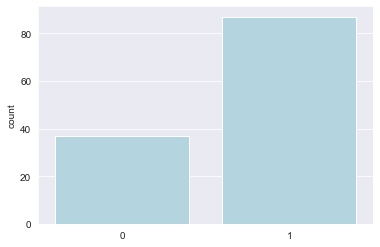

In [24]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(playlist_tracks.drop(['artist', 'track', 'group'], axis = 1))
sns.set_style('darkgrid')
sns.countplot([str(group) for group in kmeans.labels_], color = 'lightblue')

In [25]:
playlist_tracks['group_2'] = list(kmeans.labels_)
X = playlist_tracks.drop(['artist', 'track', 'group', 'group_2'], axis = 1)
y = playlist_tracks['group_2']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         9
           1       1.00      0.90      0.95        29

    accuracy                           0.92        38
   macro avg       0.88      0.95      0.90        38
weighted avg       0.94      0.92      0.92        38

[[ 9  0]
 [ 3 26]]


Although the dataset is somewhat small compared to real world examples, our logistic regression model classified the tracks in the original playlist pretty well! Finally, I will pull up the coefficients of the logistic regression model to better understand which features play a bigger role in determinining a track's cluster. 

In [30]:
log_coeff = pd.Series(log.coef_[0], index = playlist_tracks.drop(['artist', 'track', 'group', 'group_2'], axis = 1).columns)
print(log_coeff)

danceability        0.029044
energy              0.014534
key                 0.324143
loudness           -0.300891
mode                0.002807
speechiness         0.005256
acousticness        0.017582
instrumentalness    0.009828
liveness            0.000725
valence             0.010622
tempo               0.023717
duration_ms        -0.000027
time_signature      0.132116
dtype: float64
